## Solar radiation, given date and geographic latitude

### sin(θ) = sin(δ) * sin(φ) + cos(δ) * cos(φ) * cos(H)

### P = A * I * sin(θ)


Where:

 - θ is the angle of the sun's rays relative to the horizontal (in degrees)
 - δ is the solar declination angle (in degrees)
 - φ is the latitude of the location (in degrees)
 - H is the hour angle (in degrees)
 
The solar declination angle can be calculated using the following formula:

δ = 23.45 * sin[360/365 * (284 + N)]

Where N is the day of the year (starting from 1 on January 1st). This formula gives the declination angle in degrees.

Once the angle of the sun's rays is known, the solar power can be estimated using the following formula:

P = A * I * sin(θ)

Where:

 - P is the solar power (in watts)
 - A is the surface area of the solar panel (in square meters)
 - I is the intensity of the solar radiation (in watts per square meter)

In [1]:
import numpy as np
import pandas as pd

import sp_project.app_state
from sp_project.notebook_tools import default_clients
from sp_project.data_preparation.db_wetter2 import extract_data_daily

/Users/missd/.pyenv/versions/3.10.4/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
async with default_clients() as (OWclient, db):
    app_state = sp_project.app_state.AppState(ow_client=OWclient, db_client=db)
    df_wetter2 = await extract_data_daily(app_state)

In [3]:
lat = 47
day_of_year = df_wetter2.index.day_of_year

In [4]:
delta = 23.45 * np.pi / 180 * np.sin(2 * np.pi / 365 * (284 + np.array(day_of_year)))[:, None]
psi = lat * np.pi / 180
H = np.linspace(-np.pi, np.pi, 48, endpoint=False)

sin_theta = np.sin(delta) * np.sin(psi) + np.cos(delta) * np.cos(psi) * np.cos(H)

power_above_clouds = pd.Series(
    index=df_wetter2.index,
    data=np.maximum(0, sin_theta).mean(1),
)

power_above_clouds *= np.pi  # normalize to 1 at equator

<AxesSubplot:xlabel='date'>

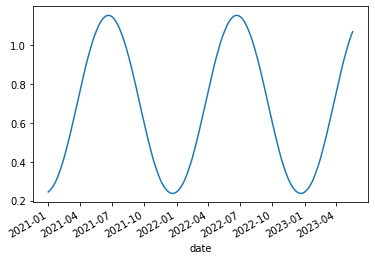

In [5]:
power_above_clouds.plot()

In [6]:
power_below_clouds = power_above_clouds * (100 - df_wetter2.clouds)/100

<AxesSubplot:xlabel='date'>

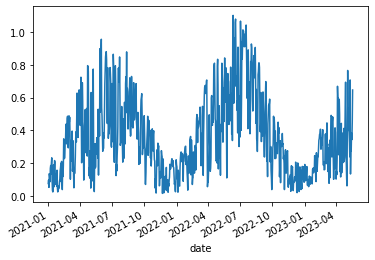

In [7]:
power_below_clouds.plot()

## Jupyter-Notebook Footer-Info

In [9]:
import os
import platform
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 22.4.0
Datetime: 2023-05-17 18:25:46
Python Version: 3.10.4
-----------------------------------
